In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
file_url = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_url)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 None)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
LR=0.1     Epoch     0 | Train Loss: 25234788843520.0000 | Val Loss: 19594863443968.0000
LR=0.1     Epoch   500 | Train Loss: 1350008045568.0000 | Va

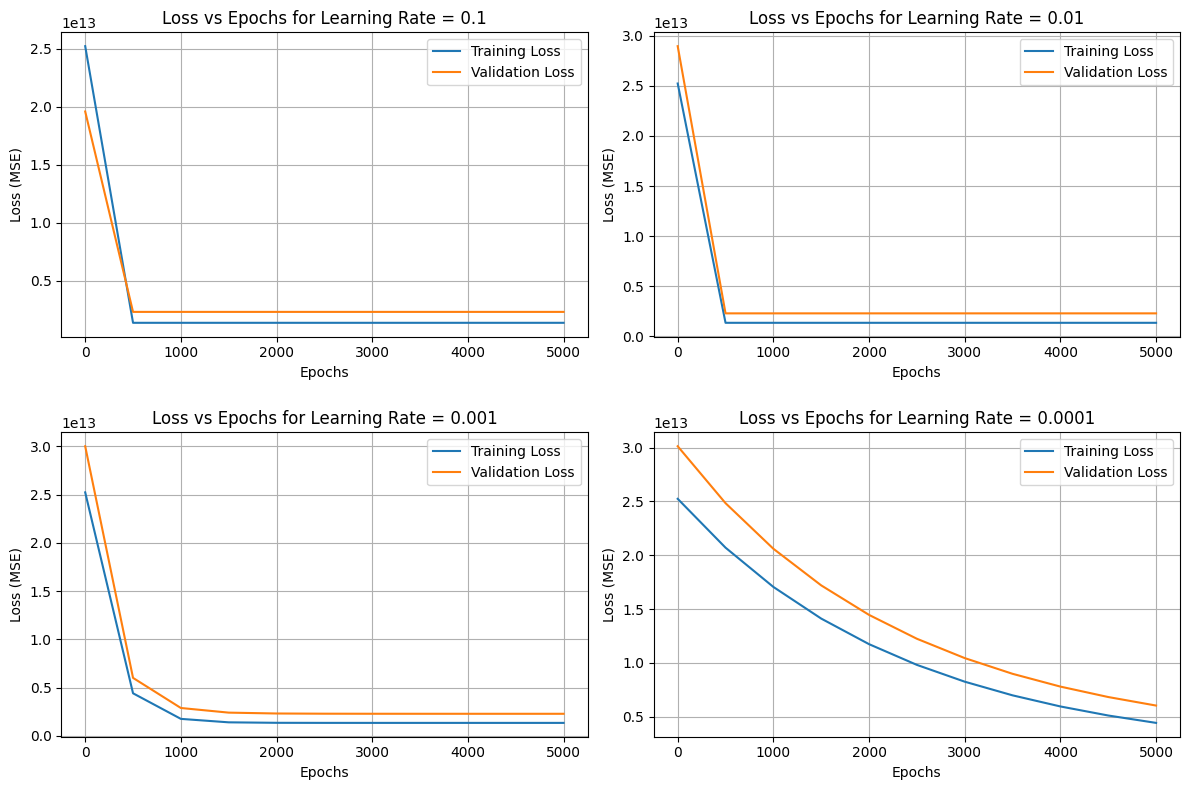

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

display(data.head())
print(data.info())

# --- Input & output selection ---
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# --- Train/validation split ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardize ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# --- Convert to tensors ---
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)

# --- Model definition ---
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, x):
        return self.linear(x)

# --- Training function ---
def train_model(lr):
    model = LinearRegressionModel(X_train_t.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    epochs = 5000
    train_losses, val_losses = [], []
    checkpoints = []

    for epoch in range(epochs + 1):
        # forward + backward
        y_pred = model(X_train_t)
        loss = criterion(y_pred, y_train_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record every 500 epochs
        if epoch % 500 == 0:
            with torch.no_grad():
                val_pred = model(X_val_t)
                val_loss = criterion(val_pred, y_val_t)
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
            checkpoints.append(epoch)
            print(f"LR={lr:<7} Epoch {epoch:5d} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

    return checkpoints, train_losses, val_losses

# --- Train all learning rates ---
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    epochs, tr_loss, val_loss = train_model(lr)
    results[lr] = (epochs, tr_loss, val_loss)

# --- Plot 2×2 grid (like your image) ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, lr in enumerate(learning_rates):
    epochs, tr_loss, val_loss = results[lr]
    axs[i].plot(epochs, tr_loss, label='Training Loss')
    axs[i].plot(epochs, val_loss, label='Validation Loss')
    axs[i].set_title(f"Loss vs Epochs for Learning Rate = {lr}")
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel("Loss (MSE)")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


